In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

from astropy.table import Table


In [3]:
import surp
import arya

In [4]:
df = surp.subgiants
len(df)

16365

Text(0, 0.5, 'z (kpc)')

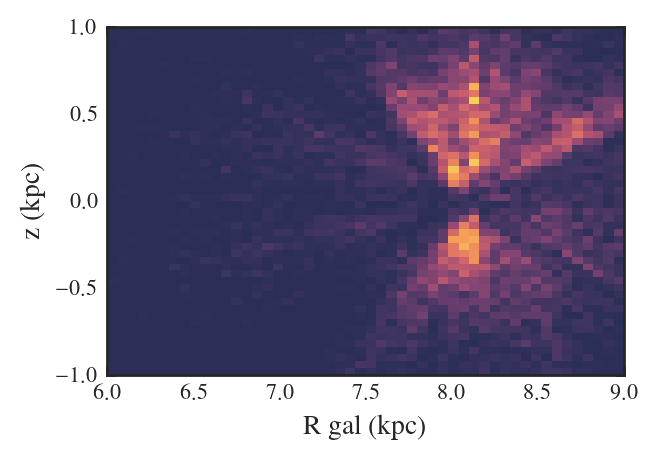

In [5]:
plt.hist2d(df.R_gal, df.z_gal, range=[(6, 9),(-1, 1)], bins=50)
plt.xlabel("R gal (kpc)")
plt.ylabel("z (kpc)")

Text(0, 0.5, '[C/Mg]')

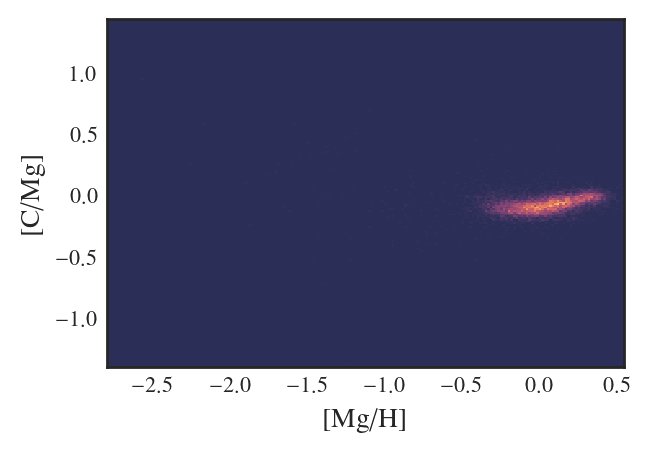

In [6]:
filt = ~df["high_alpha"]
plt.hist2d(df[filt]["MG_H"], df[filt]["C_MG"], 200)
plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

In [7]:
x = np.linspace(-2, 1, 100)
y = surp.gce_math.mg_fe_cutoff(x)

Text(0, 0.5, '[Mg/Fe]')

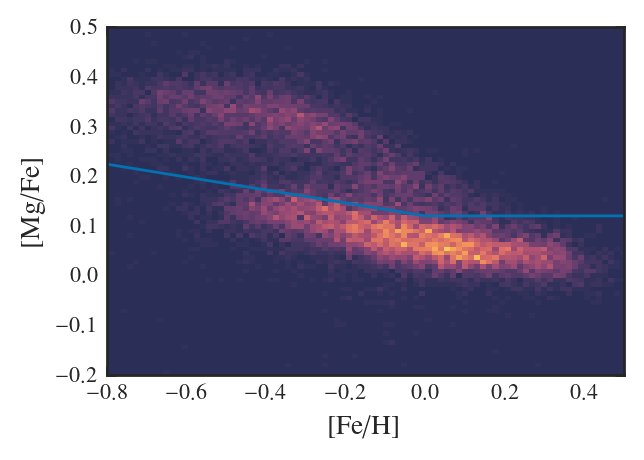

In [8]:
plt.hist2d(df["FE_H"], df["MG_FE"], 200);
plt.xlim(-0.8, 0.5)
plt.ylim(-0.2, 0.5)
plt.plot(x, y)
plt.xlabel("[Fe/H]")
plt.ylabel("[Mg/Fe]")

Plot of the o/fe-fe/h bimodality in apogee data

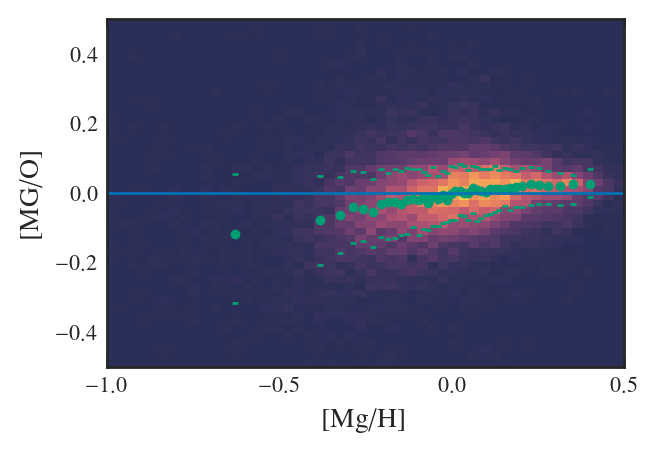

In [9]:
plt.hist2d(df.MG_H, df.MG_H - df.O_H, range=[(-1, 0.5), (-0.5, 0.5)], bins=50);
plt.axhline(0)
plt.xlabel("[Mg/H]")
plt.ylabel("[MG/O]")

df["MG_O"] = df.MG_H - df.O_H
arya.medianplot(df, "MG_H", "MG_O", stat="median", binsize=400, color=arya.style.COLORS[2])

Text(0.5, 0, '[O/Fe] err')

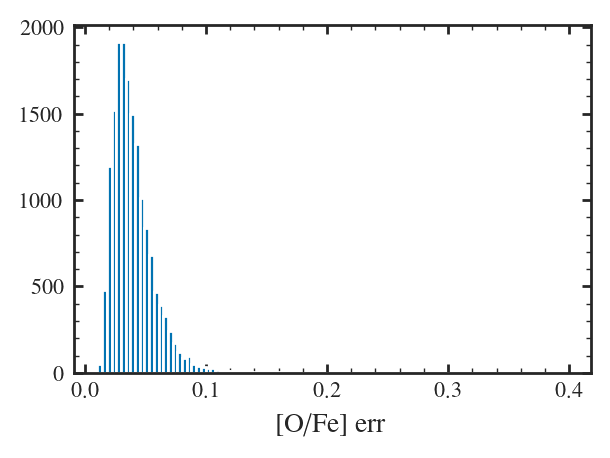

In [10]:
plt.hist(df["O_FE_ERR"], 100);
plt.xlabel("[O/Fe] err")

(0.0, 0.1)

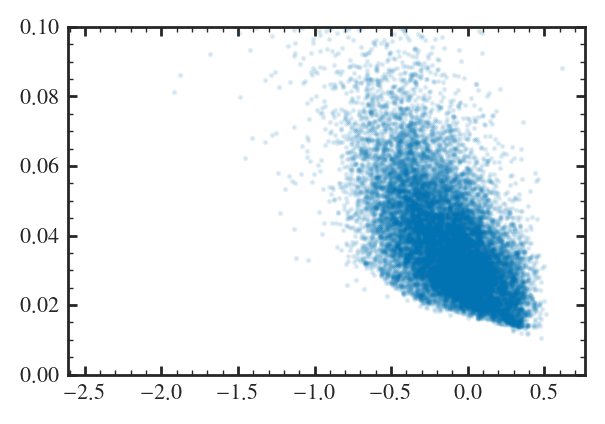

In [11]:
plt.scatter(df.FE_H, df.O_FE_ERR, alpha=0.1, s=1)
plt.ylim(0, 0.1)

In [12]:
from scipy.optimize import curve_fit

In [13]:
def linear(x, a, b):
    return a*x + b

In [14]:
%load_ext autoreload
%autoreload 2

In [15]:
import sys
sys.path.append("..")
import errors

[-0.00557748  0.00831548]


(0.0, 0.02)

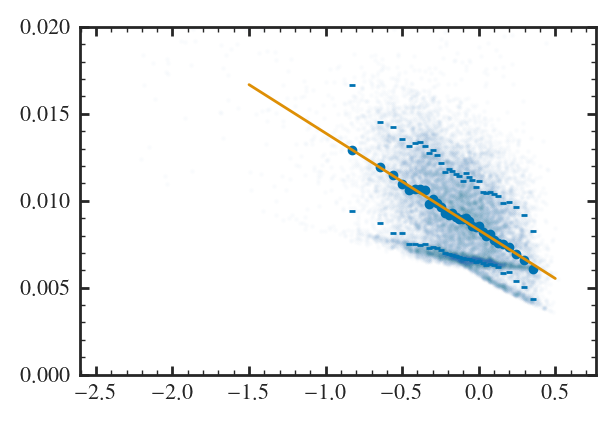

In [23]:
plt.scatter(df.FE_H, df.FE_H_ERR, alpha=0.01, s=1)

md = arya.medianplot(df, "FE_H", "FE_H_ERR", binsize=500)

popt, covt = curve_fit(linear, md.x, md.y)
print(popt)
x = np.linspace(-1.5, 0.5, 100)
y = errors.fe_h_err(x)
plt.plot(x, y)
plt.ylim(0, 0.02)

[-0.03789911  0.03505672]


(0.0, 0.1)

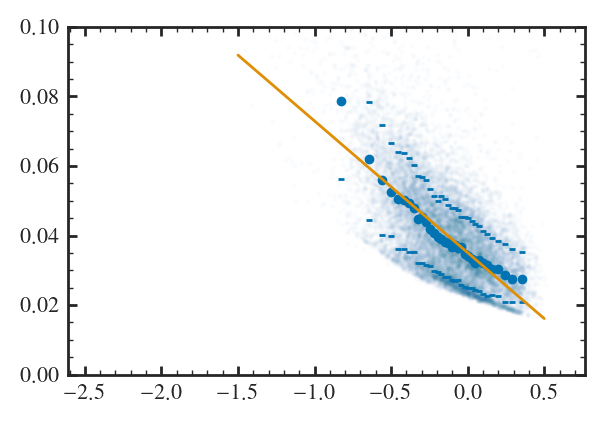

In [25]:
plt.scatter(df.FE_H, df.C_MG_ERR, alpha=0.01, s=1)

md = arya.medianplot(df, "FE_H", "C_MG_ERR", binsize=500)

popt, covt = curve_fit(linear, md.x, md.y)

y = errors.c_mg_err(x)
plt.plot(x, y)
print(popt)
plt.ylim(0, 0.1)

In [27]:
def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

[0.06521454 0.00522015 0.03381753]


(0.0, 0.1)

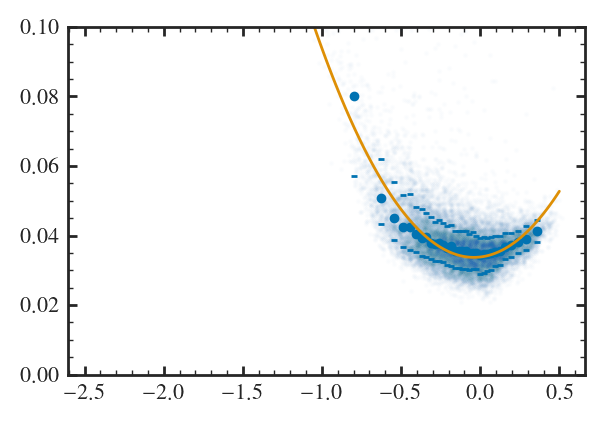

In [28]:
plt.scatter(df.FE_H, df.MG_H_ERR, alpha=0.01, s=1)

md = arya.medianplot(df, "FE_H", "MG_H_ERR", binsize=500)

popt, covt = curve_fit(quadratic, md.x, md.y)

x = np.linspace(-1.5, 0.5, 100)
y = errors.mg_h_err(x)
plt.plot(x, y)
print(popt)
plt.ylim(0, 0.1)

[ 0.00792663 -0.00801737  0.0138201 ]


(0.0, 0.05)

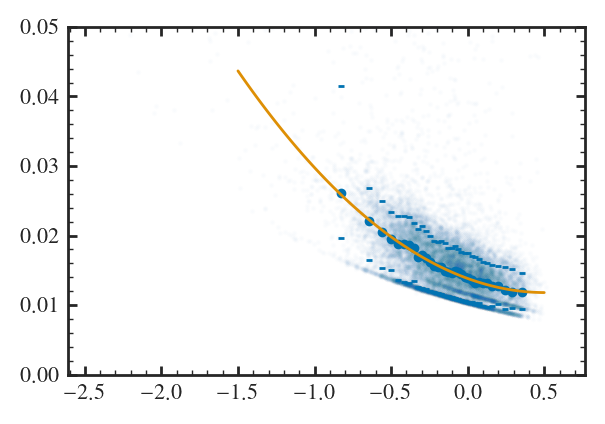

In [29]:
plt.scatter(df.FE_H, df.MG_FE_ERR, alpha=0.01, s=1)

md = arya.medianplot(df, "FE_H", "MG_FE_ERR", binsize=500)

popt, covt = curve_fit(quadratic, md.x, md.y)

x = np.linspace(-1.5, 0.5, 100)
y = errors.mg_fe_err(x)
plt.plot(x, y)
print(popt)
plt.ylim(0, 0.05)